In [1]:
import os
from pathlib import Path
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gns_utils import split_dataframe, csv_log_to_dataframe

In [2]:
pd.options.mode.chained_assignment = None
DATA_DIR = Path("2_hyperparameters/results")
VIS_DIR = Path("2_hyperparameters/visuals")

## Collect all experiment results

In [3]:
## Load and merge csv outputs
data = pd.concat([csv_log_to_dataframe(DATA_DIR / file) for file in os.listdir(DATA_DIR)], ignore_index=True)
metadata, parameters, results = split_dataframe(data)

metadata

,date,runtime (s),user,host,ckpt_dir,vis_dir,save_fig,accumulate,epoch,verbose,no_seed,no_warnings
0,2025-01-28 23:52:04,277.734532,cimsir,buchit.cip.ifi.lmu.de,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,True,False,False,False,True
1,2025-01-28 23:56:48,477.328461,cimsir,buchit.cip.ifi.lmu.de,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,True,False,False,False,True
2,2025-01-29 00:07:13,883.149583,cimsir,buchit.cip.ifi.lmu.de,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,True,False,False,False,True
3,2025-01-29 05:11:33,455.947758,cimsir,andesit.cip.ifi.lmu.de,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,True,False,False,False,True
4,2025-01-29 02:19:08,90.954725,cimsir,buchit.cip.ifi.lmu.de,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,True,False,False,False,True
5,2025-01-29 02:20:44,113.649934,cimsir,buchit.cip.ifi.lmu.de,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,True,False,False,False,True
6,2025-01-29 03:11:21,87.484566,cimsir,andesit.cip.ifi.lmu.de,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,True,False,False,False,True
7,2025-01-29 01:56:24,476.943043,cimsir,buchit.cip.ifi.lmu.de,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,True,False,False,False,True
8,2025-01-29 02:04:27,875.726643,cimsir,buchit.cip.ifi.lmu.de,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,True,False,False,False,True
9,2025-01-29 03:17:50,459.393482,cimsir,andesit.cip.ifi.lmu.de,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,True,False,False,False,True


## Select relevant input/output parameters

In [4]:
df = pd.concat([parameters, results], axis=1).drop(["t_min", "t_max", "diff_steps", "b_true", "true_portion"], axis=1)
df

,training_step,b,B,gns_est,g_norm,runtime (s)
0,20000,50,5000,3.714135,0.645973,277.734532
1,20000,100,10000,3.811274,0.656606,477.328461
2,20000,100,10000,17.253965,0.649377,883.149583
3,20000,50,5000,2.240862,0.649705,455.947758
4,40000,50,500,145.334778,0.116866,90.954725
5,40000,100,1000,205.045761,0.115099,113.649934
6,40000,50,500,77.409424,0.117040,87.484566
7,40000,50,5000,11.717736,0.116137,476.943043
8,40000,100,10000,30.147373,0.115453,875.726643
9,40000,50,5000,15.114058,0.116818,459.393482


## Group by input parameters on average output values:

In [5]:
df_avg = df.groupby(["training_step", "b", "B"]).mean(["gns_est", "g_norm", "runtime"])
df_avg

gns_est    g_norm  runtime (s)
training_step b    B                                       
10000         50   500      1.551734  1.032575   102.741013
                   5000     6.259650  1.035718   387.090712
              100  1000    15.992733  1.032651   158.331585
                   10000    7.081355  1.040549   693.837525
              1000 10000   36.255239  1.039108   728.557946
20000         50   500      5.966791  0.652996   100.524092
                   5000     2.977498  0.647839   366.841145
              100  1000     8.167123  0.650851   150.850705
                   10000   10.532620  0.652991   680.239022
30000         50   500     14.549258  0.185706    97.453999
                   5000     7.021934  0.186211   367.590832
              100  1000    30.083402  0.187508   132.841564
                   10000   22.243799  0.185965   666.437828
              1000 10000   28.851490  0.185774   718.330558
40000         50   500    124.255108  0.116524   101.262129
                   5000    12.567849  0.116369   368.991450
              100  1000   130.244008  0.115201   141.135070
                   10000   25.654094  0.116285   665.026481
50000         50   5000    21.039116  0.073645   368.446613
              100  10000   59.784865  0.073136   664.961930

In [6]:
df_min = df.groupby(["training_step", "b", "B"]).min(["gns_est", "g_norm", "runtime"])
df_min

gns_est    g_norm  runtime (s)
training_step b    B                                      
10000         50   500     0.973950  1.029339    91.567261
                   5000    1.940867  1.025462   289.501444
              100  1000   15.992733  1.032651   158.331585
                   10000   3.387887  1.037546   503.233847
              1000 10000  19.602121  1.036906   510.434096
20000         50   500     3.221483  0.651466    87.639980
                   5000    2.240862  0.645973   277.734532
              100  1000    8.167123  0.650851   150.850705
                   10000   3.811274  0.649377   477.328461
30000         50   500     3.748023  0.184688    87.690593
                   5000    4.603214  0.184355   261.305224
              100  1000   16.639282  0.186424   108.720306
                   10000  15.952942  0.183825   457.749359
              1000 10000   5.897496  0.185081   491.143896
40000         50   500    77.409424  0.115399    87.484566
                   5000    9.655730  0.115622   261.064763
              100  1000   18.643888  0.115035   113.649934
                   10000  10.525808  0.115453   457.228745
50000         50   5000   15.172640  0.073349   262.445342
              100  10000  42.097534  0.072787   457.685031

In [7]:
df_max = df.groupby(["training_step", "b", "B"]).max(["gns_est", "g_norm", "runtime"])
df_max

gns_est    g_norm  runtime (s)
training_step b    B                                       
10000         50   500      2.129518  1.035812   113.914765
                   5000    10.578432  1.045974   484.679980
              100  1000    15.992733  1.032651   158.331585
                   10000   10.774823  1.043553   884.441204
              1000 10000   52.908356  1.041310   946.681797
20000         50   500      8.712099  0.654526   113.408205
                   5000     3.714135  0.649705   455.947758
              100  1000     8.167123  0.650851   150.850705
                   10000   17.253965  0.656606   883.149583
30000         50   500     22.867668  0.186296   113.424695
                   5000     9.466762  0.187480   475.847607
              100  1000    41.437298  0.188159   158.277865
                   10000   31.364611  0.187809   883.531840
              1000 10000   71.668434  0.186415   953.288345
40000         50   500    184.267075  0.117040   113.594372
                   5000    15.114058  0.116899   476.943043
              100  1000   205.045761  0.115469   158.069086
                   10000   36.499161  0.117010   875.726643
50000         50   5000    26.905842  0.074369   477.381384
              100  10000   74.299416  0.073478   878.996053

## Visualize results

Estimated GNS for each model (training step) dependent on (b, B) values:

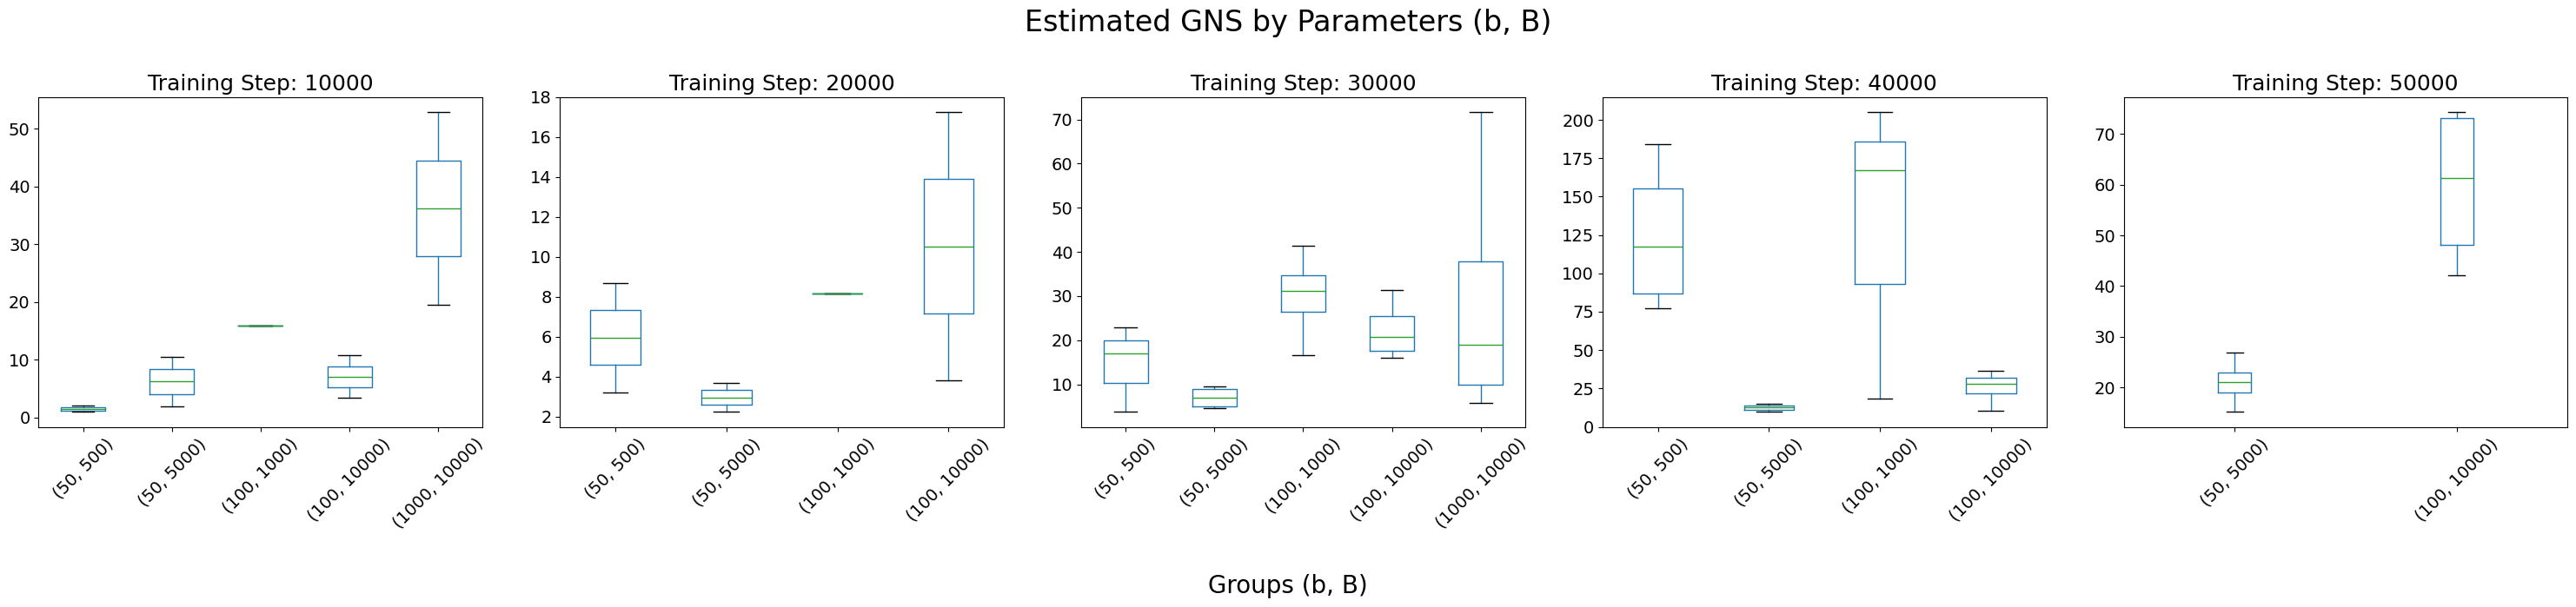

In [8]:
training_steps = sorted(set(df["training_step"]))
fig, axes = plt.subplots(1, len(training_steps), figsize=(6 * len(training_steps), 7))

for i, (step, ax) in enumerate(zip(training_steps, axes)):
    df_model = df[df["training_step"] == step]
    df_model.boxplot(column="gns_est", by=["b", "B"], grid=False, ax=ax)
    
    ax.set_title(f"Training Step: {step}", fontsize=18)
    ax.tick_params(axis="x", rotation=45, labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.set_xlabel("")

fig.suptitle("Estimated GNS by Parameters (b, B)", fontsize=24)
fig.supxlabel("Groups (b, B)", fontsize=20)
plt.tight_layout(pad=2.0)

plt.savefig(VIS_DIR/"2_model_gns_by_bB.png")
plt.show()

Changes in g_true and gns_est dependent on training step for each (b, B) pair:

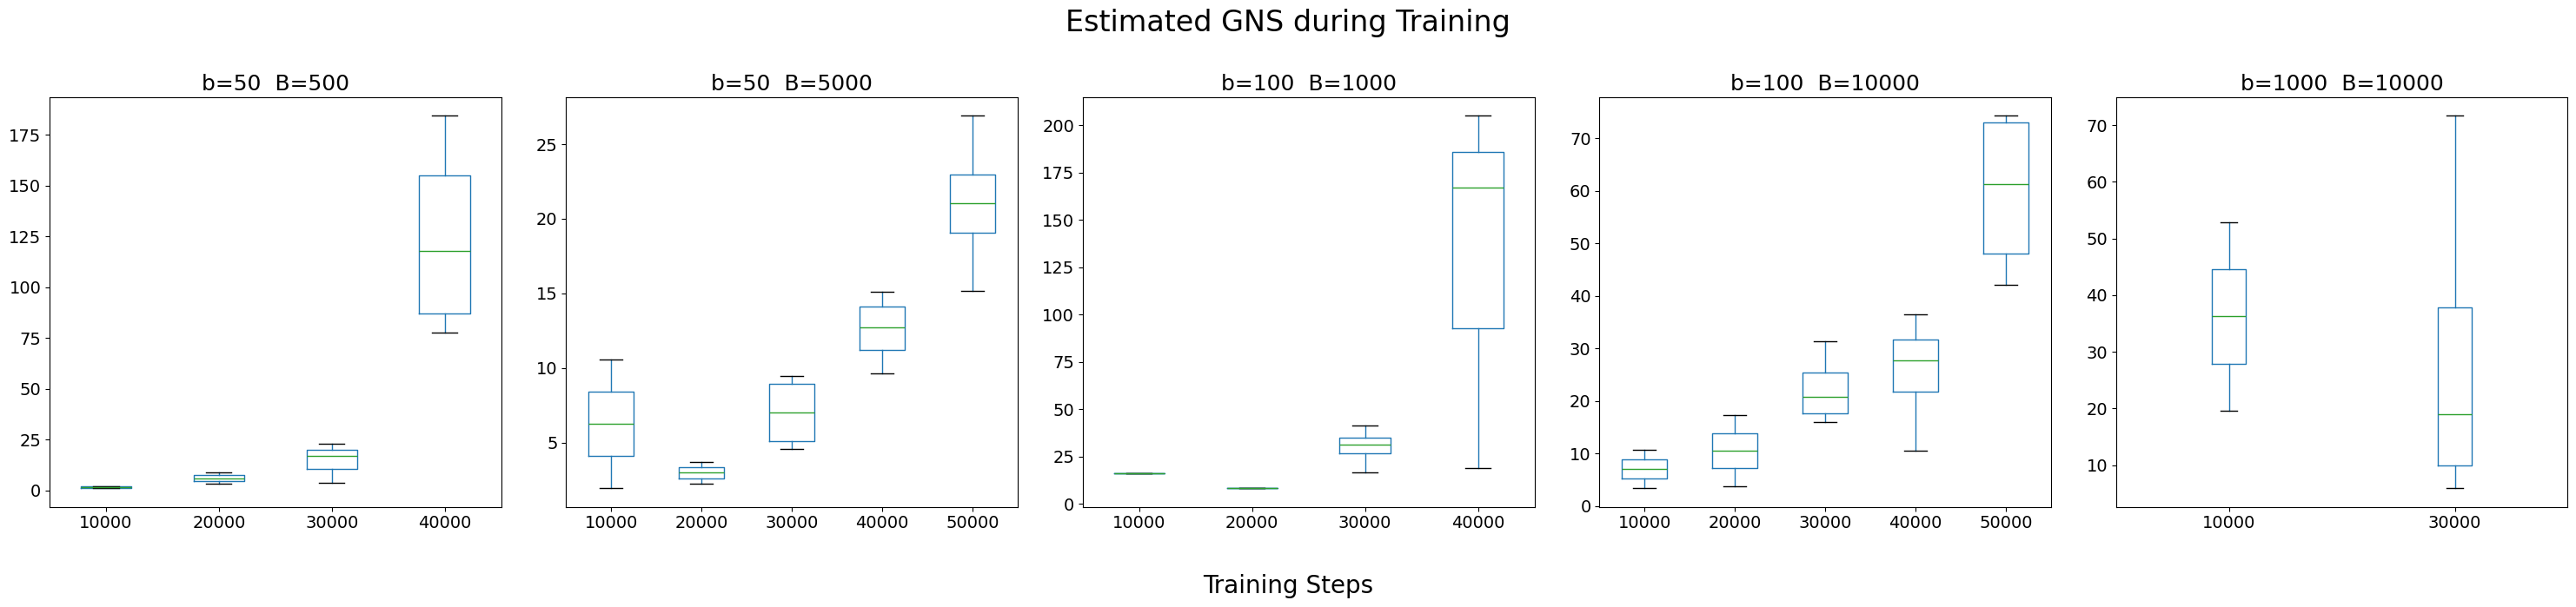

In [9]:
bB = df.groupby(['b', "B"]).count()["training_step"].rename({"training_step":"count"})
fig, axes = plt.subplots(1, len(bB), figsize=(6 * len(bB), 7))

for (b, B), ax in zip(bB.index, axes): 
    df_pair = df[(df['b'] == b) & (df['B'] == B)].drop(['b', 'B'], axis=1)
    df_pair.boxplot(by="training_step", column=["gns_est"], ax=ax, grid=False)
    
    ax.set_title(f"b={b}  B={B}", fontsize=18)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.set_xlabel("")

fig.suptitle("Estimated GNS during Training", fontsize=24)
fig.supxlabel("Training Steps", fontsize=20)
plt.tight_layout(pad=2.0)

plt.savefig(VIS_DIR/"2_bB_gns_during_training.png")
plt.show()

Runtimes dependent on training step for each (b, B) pair:

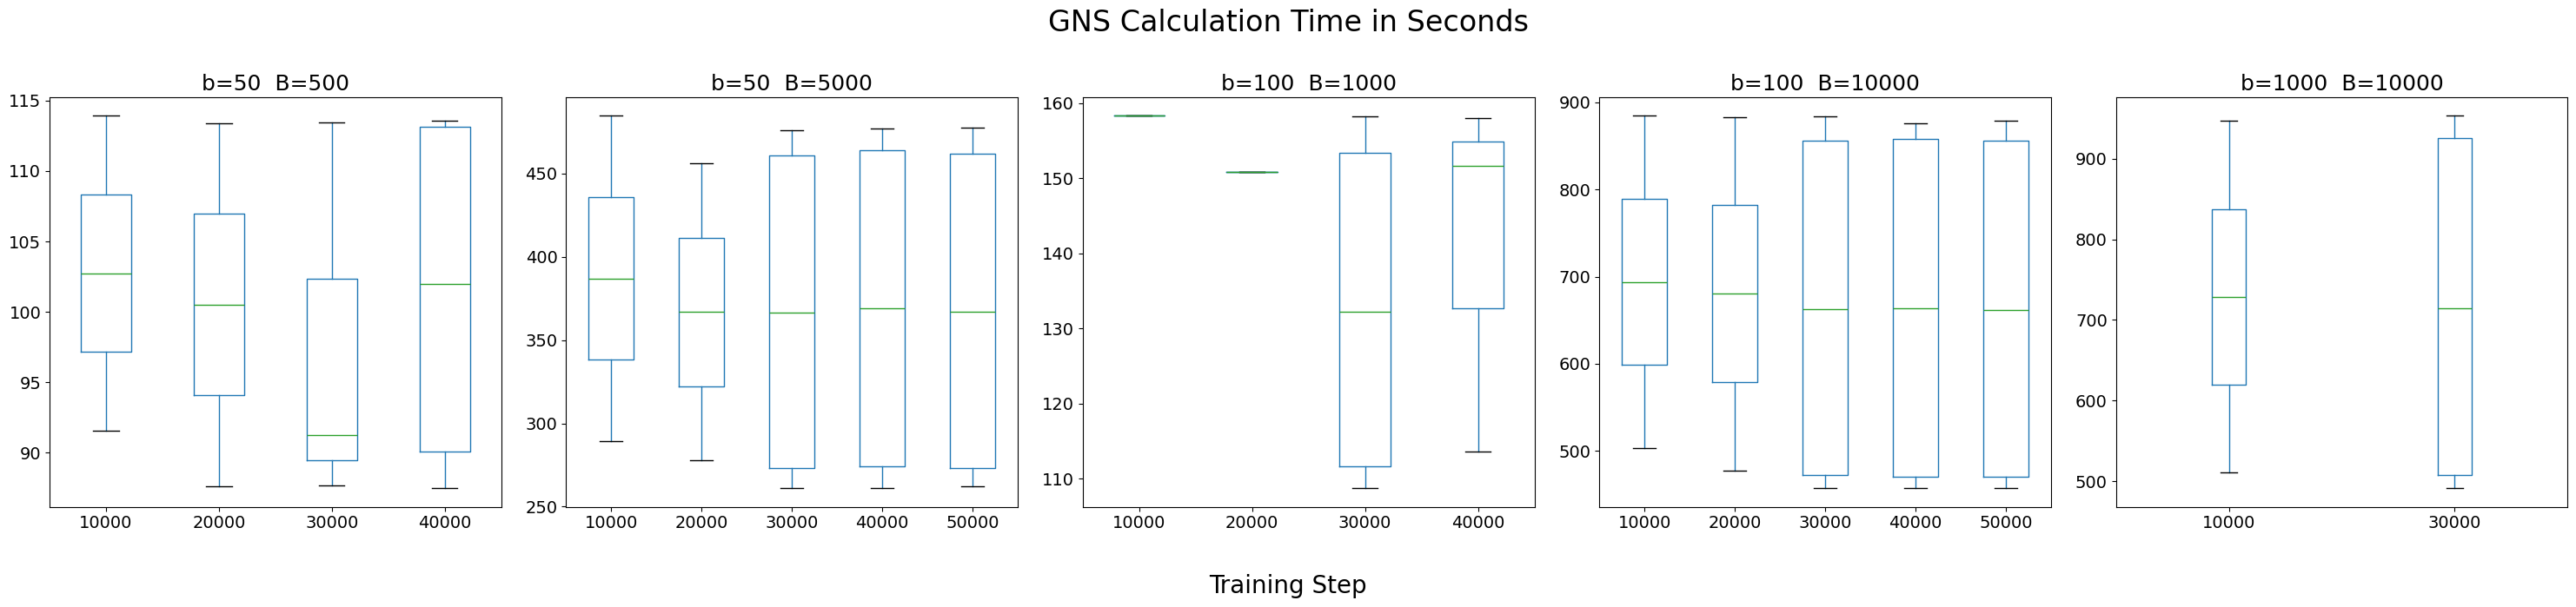

In [10]:
bB = df.groupby(['b', "B"]).count()["training_step"].rename({"training_step":"count"})
fig, axes = plt.subplots(1, len(bB), figsize=(6 * len(bB), 7))

for (b, B), ax in zip(bB.index, axes): 
    df_pair = df[(df['b'] == b) & (df['B'] == B)].drop(['b', 'B'], axis=1)
    df_pair.boxplot(by="training_step", column=["runtime (s)"], ax=ax, grid=False)
    
    ax.set_title(f"b={b}  B={B}", fontsize=18)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.set_xlabel("")

fig.suptitle("GNS Calculation Time in Seconds", fontsize=24)
fig.supxlabel("Training Step", fontsize=20)
plt.tight_layout(pad=2.0)

plt.savefig(VIS_DIR/"2_gns_runtimes_by_bB.png")
plt.show()

In [11]:
avg_runtimes = df.groupby(["training_step", "b", "B"]).mean()["runtime (s)"].reset_index()
avg_runtimes["Bb_ratio"] = avg_runtimes["B"] / avg_runtimes["b"]
avg_runtimes = avg_runtimes.rename(columns={"runtime (s)":"avg_runtime (s)"}).drop(["b", "B"], axis=1)

ratios = set(avg_runtimes['Bb_ratio'])
print(f"Tested ratios: {ratios}\n")

runtimes10 = avg_runtimes[avg_runtimes["Bb_ratio"] == 10].drop('Bb_ratio', axis=1)
runtimes100 = avg_runtimes[avg_runtimes["Bb_ratio"] == 100].drop('Bb_ratio', axis=1)

avg_runtimes

Tested ratios: {10.0, 100.0}



,training_step,avg_runtime (s),Bb_ratio
0,10000,102.741013,10.0
1,10000,387.090712,100.0
2,10000,158.331585,10.0
3,10000,693.837525,100.0
4,10000,728.557946,10.0
5,20000,100.524092,10.0
6,20000,366.841145,100.0
7,20000,150.850705,10.0
8,20000,680.239022,100.0
9,30000,97.453999,10.0


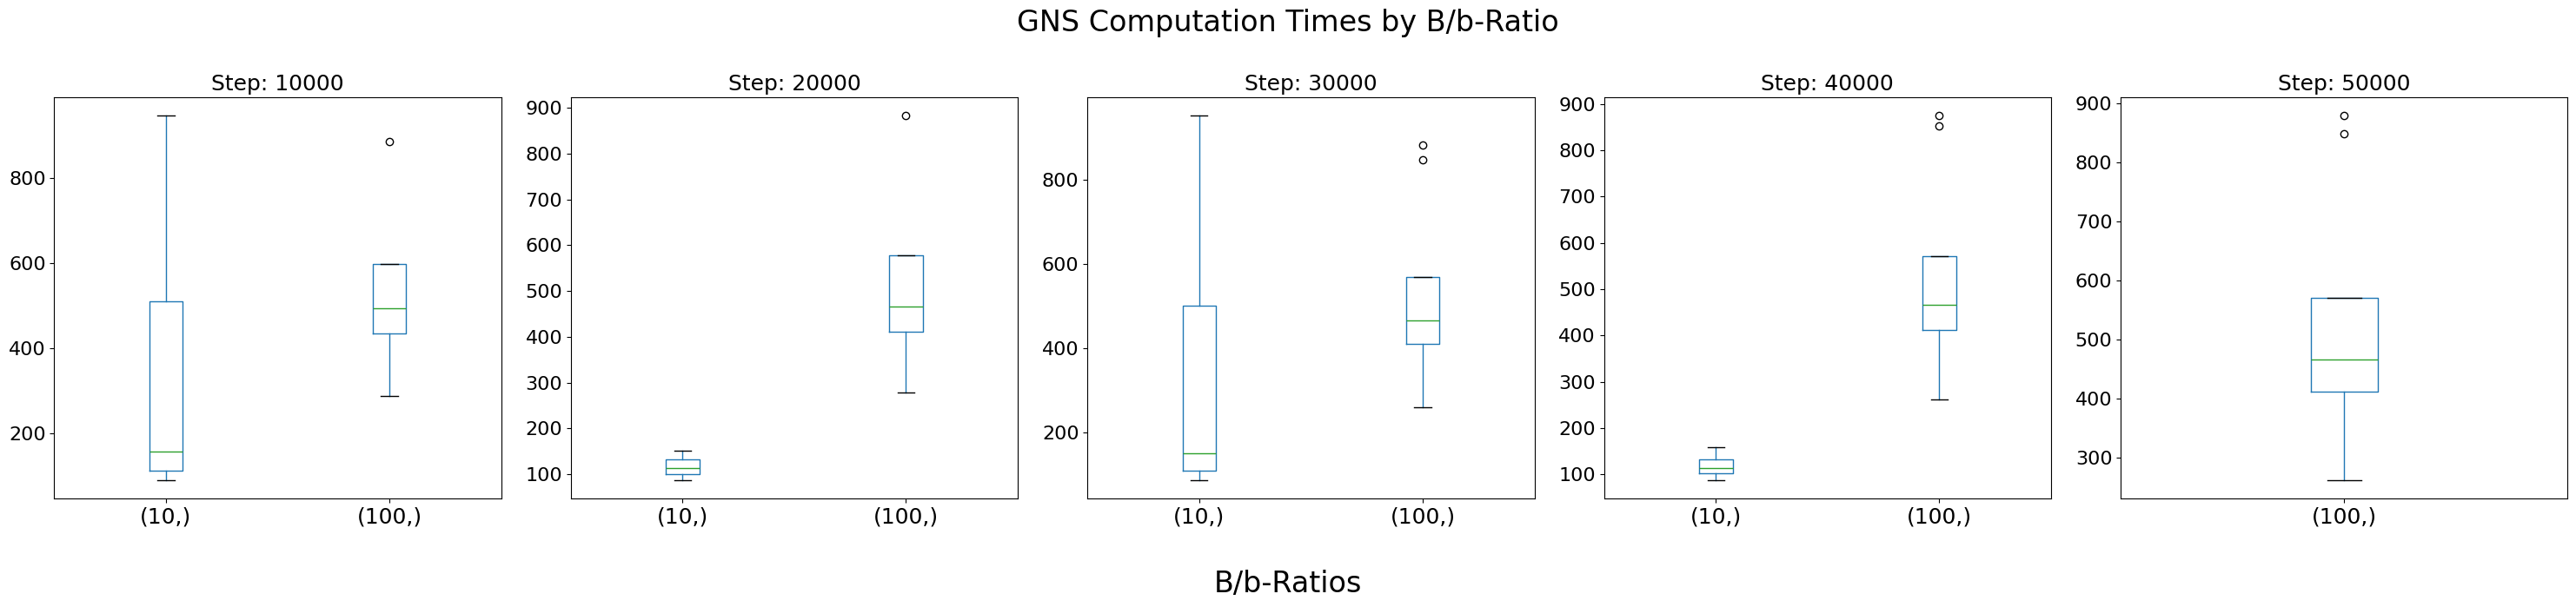

In [12]:
training_steps = sorted(set(df["training_step"]))
fig, axes = plt.subplots(1, len(training_steps), figsize=(6 * len(training_steps), 7))

for i, (step, ax) in enumerate(zip(training_steps, axes)):
    df_model = df[df["training_step"] == step]
    df_model["Bb_ratio"] = (df_model["B"] / df_model["b"]).astype(int)
    df_model.boxplot(column="runtime (s)", by=["Bb_ratio"], grid=False, ax=ax)
    
    ax.set_title(f"Step: {step}", fontsize=18)
    ax.set_xlabel(f"", fontsize=15)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=16)
    
fig.suptitle("GNS Computation Times by B/b-Ratio", fontsize=24)
fig.supxlabel("B/b-Ratios", fontsize=24)
plt.tight_layout(pad=2.0)

plt.savefig(VIS_DIR/"2_gns_runtimes_by_bB_ratio.png")
plt.show()

## Scatter Matrix of Variables

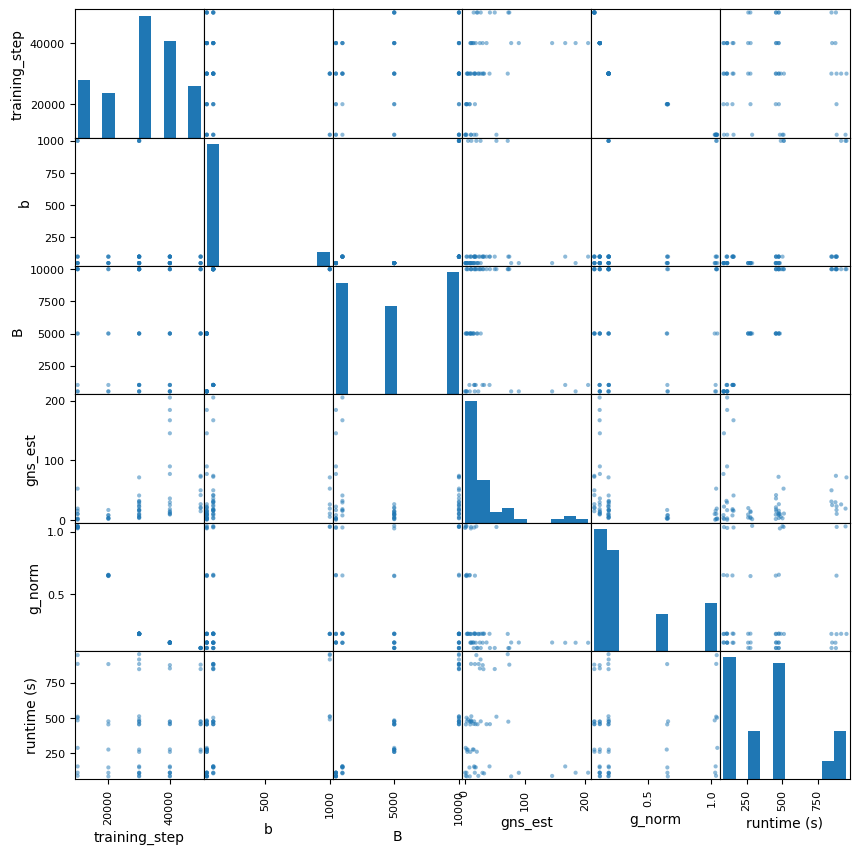

In [13]:
pd.plotting.scatter_matrix(df, figsize=(10, 10))

plt.savefig(VIS_DIR/"2_scatter_all.png")
plt.show()

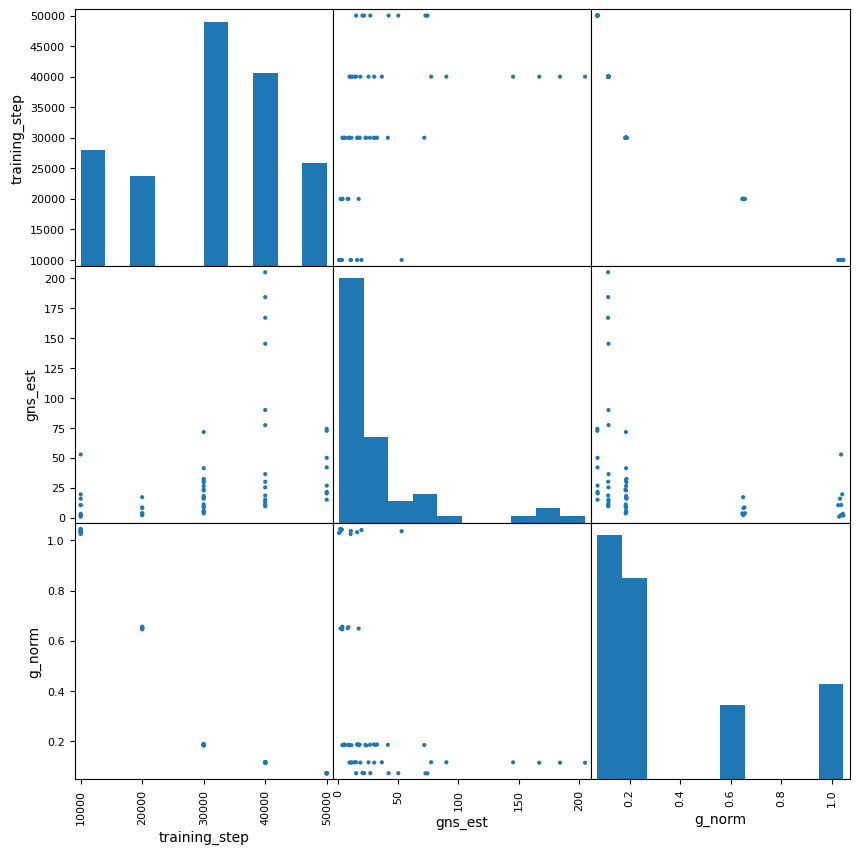

In [14]:
pd.plotting.scatter_matrix(df.sort_values(by=["training_step"]).drop(["b", "B", "runtime (s)"], axis=1),
                           figsize=(10, 10),
                           alpha=1)

plt.savefig(VIS_DIR/"2_scatter_results.png")
plt.show()

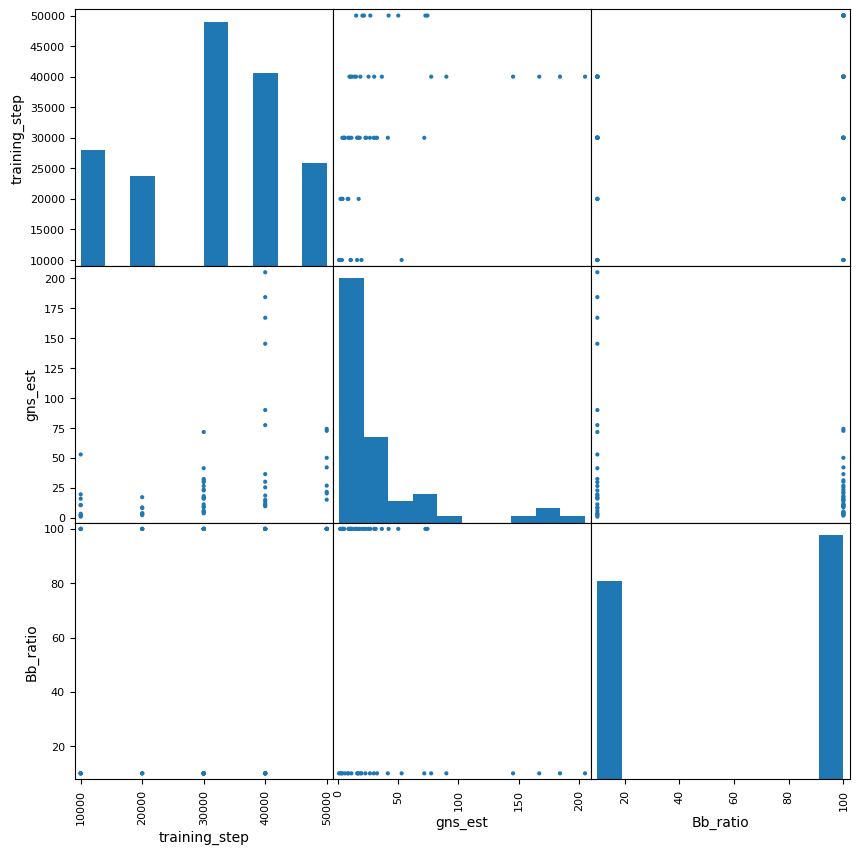

In [15]:
df["Bb_ratio"] = df["B"] / df["b"]
df_ratio = df.sort_values(by=["training_step"]).drop(["g_norm", "runtime (s)", "b", "B"], axis=1,)
pd.plotting.scatter_matrix(df_ratio, figsize=(10, 10), alpha=1)

plt.savefig(VIS_DIR/"2_scatter_Bb_ratio")
plt.show()